In [2337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
%matplotlib inline

In [2338]:
##--Load train data and test data--
train_df = pd.read_csv('D:/数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/train_data.csv')
test_df = pd.read_csv('D:\数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/test_a.csv')

In [2339]:
##--drop "city" and "ID"--
train_df.drop(labels=['city','ID'],axis=1,inplace=True)
test_df.drop(labels=['city','ID'],axis=1,inplace=True)

## ---------------------------------------------Quiring the data-------------------------------------------------

In [2340]:
##--Quiring the data--
train_df.head(10)

,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,region,plate,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,68.060,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,RG00001,BK00064,...,0,0.000,28248,614,111546,1124.000,284.000,0,2018/11/28,2000.000
1,125.550,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,RG00002,BK00049,...,0,0.000,14823,148,157552,701.000,22.000,1,2018/12/16,2000.000
2,132.000,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,RG00002,BK00050,...,0,0.000,77645,520,131744,57.000,20.000,1,2018/12/22,16000.000
3,57.000,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,RG00002,BK00051,...,332760000,3080.033,8750,1665,253337,888.000,279.000,9,2018/12/21,1600.000
4,129.000,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,RG00003,BK00044,...,0,0.000,800,117,125309,2038.000,480.000,0,2018/11/18,2900.000
5,223.350,未知方式,4室3厅3卫,低,2,暂无数据,其他,XQ00457,RG00002,BK00052,...,0,0.000,48204,44561,719428,4832.000,1304.000,0,2018/11/14,14000.000
6,78.940,未知方式,2室2厅1卫,中,18,暂无数据,其他,XQ00246,RG00002,BK00051,...,0,0.000,8750,1467,253337,1586.000,469.000,0,2018/11/18,1000.000
7,76.000,未知方式,2室1厅1卫,中,5,暂无数据,其他,XQ02331,RG00006,BK00031,...,0,0.000,28546,0,371900,40787.000,2942.000,0,2018/3/24,1800.000
8,120.550,未知方式,3室2厅1卫,中,6,暂无数据,其他,XQ02346,RG00006,BK00031,...,0,0.000,28546,0,371900,40787.000,2942.000,0,2018/3/19,1450.000
9,83.000,未知方式,3室1厅1卫,中,5,暂无数据,其他,XQ02310,RG00006,BK00031,...,0,0.000,28546,0,371900,34441.000,3035.000,0,2018/4/26,1700.000


In [2341]:
test_df.head(10)

,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,region,plate,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime
0,36.540,未知方式,1室1厅1卫,高,21,西北,其他,XQ03867,RG00012,BK00013,...,0.000,0,0.000,41503,319,301635,1601.000,397.000,2,2018/10/25
1,64.000,未知方式,2室1厅1卫,高,11,南北,其他,XQ00821,RG00002,BK00055,...,0.000,0,0.000,4370,0,306857,21123.000,3066.000,0,2018/8/19
2,98.000,未知方式,3室1厅1卫,高,6,暂无数据,精装,XQ00842,RG00002,BK00055,...,0.000,0,0.000,4370,0,306857,17471.000,2554.000,0,2018/3/4
3,43.450,未知方式,1室1厅1卫,高,6,暂无数据,其他,XQ00786,RG00002,BK00055,...,0.000,0,0.000,4370,0,306857,19231.000,2016.000,0,2018/2/3
4,92.000,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01201,RG00002,BK00062,...,237828.350,1078790000,4536.000,20904,0,245872,26189.000,2957.000,0,2018/3/14
5,82.800,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01209,RG00002,BK00062,...,132870.000,573070000,4313.010,20904,0,245872,29635.000,2662.000,0,2018/2/27
6,60.000,未知方式,1室1厅1卫,低,6,南北,其他,XQ00590,RG00002,BK00054,...,0.000,0,0.000,8498,29901,428071,5543.000,1634.000,1,2018/10/12
7,76.000,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ00658,RG00002,BK00054,...,0.000,0,0.000,8498,0,428071,26130.000,2703.000,0,2018/3/4
8,42.420,未知方式,1室1厅1卫,低,6,暂无数据,其他,XQ01155,RG00002,BK00061,...,0.000,0,0.000,4370,0,306857,19231.000,2016.000,0,2018/2/26
9,56.750,未知方式,1室1厅1卫,中,13,暂无数据,其他,XQ00937,RG00002,BK00056,...,0.000,0,0.000,388879,0,491767,32846.000,4175.000,0,2018/8/31


In [2342]:
train_df.describe()

,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,...,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41422.000,41422.000,41440.000,41440.000
mean,70.959,11.413,1.339,5.741,187.197,1.506,48.229,6.272,4.309,57.757,...,12621.406,104536347.973,724.764,77250.235,1137.132,294514.059,26945.664,3089.077,0.396,8837.074
std,88.120,7.375,3.180,4.605,179.675,1.688,29.568,4.946,3.360,40.084,...,49853.120,521521646.552,3224.304,132052.509,7667.382,196745.147,32174.638,2954.707,1.654,551428.659
min,1.000,0.000,0.000,0.000,24.000,0.000,9.000,0.000,0.000,8.000,...,0.000,0.000,0.000,600.000,0.000,49330.000,17.000,6.000,0.000,0.000
25%,42.608,6.000,0.000,2.000,74.000,0.000,24.000,2.000,1.000,33.000,...,0.000,0.000,0.000,13983.000,0.000,165293.000,7928.000,1053.000,0.000,2800.000
50%,65.000,7.000,0.000,5.000,128.000,1.000,47.000,5.000,4.000,40.000,...,0.000,0.000,0.000,38947.000,0.000,245872.000,20196.000,2375.000,0.000,4000.000
75%,90.000,16.000,1.000,7.000,258.000,3.000,61.000,9.000,6.000,83.000,...,0.000,0.000,0.000,76668.000,0.000,330610.000,34485.000,4233.000,0.000,5500.000
max,15055.000,88.000,52.000,22.000,824.000,8.000,142.000,24.000,14.000,174.000,...,555508.010,6197570000.000,37513.062,855400.000,143700.000,928198.000,621864.000,39876.000,37.000,99999999.990


一些特征存在明显的outlier,如"area"、"saleSecHouseNum"、"tradeMoney"

In [2343]:
train_df.describe(include=['O'])

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,tradeTime
count,41440,41440,41440,41440,41440,41440,41440,41440,41440,41440
unique,4,104,3,10,4,4236,15,66,80,361
top,未知方式,1室1厅1卫,中,南,其他,XQ01834,RG00002,BK00031,1994,2018/3/3
freq,30759,9805,15458,34377,29040,358,11437,1958,2851,543


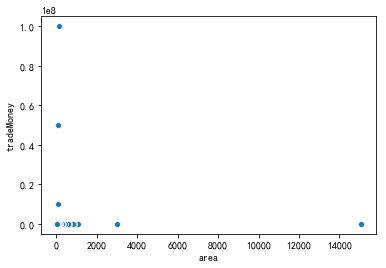

In [2344]:
##--analysis "area" and "tradeMoney"
sns.scatterplot(x="area",y="tradeMoney",data=train_df)
plt.show()

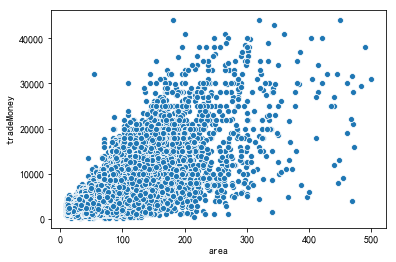

In [2345]:
train_df=train_df[(train_df["area"]<500)&(train_df["area"]>10)]
train_df = train_df[(train_df["tradeMoney"]<45000)&(train_df["tradeMoney"]>200)]
sns.scatterplot(x="area",y="tradeMoney",data=train_df)
plt.show()

## -------------------The predicted variable - tradeMoney Skew & kurtosis analysis----------------

In [2346]:
print("Skewness:",train_df['tradeMoney'].skew())

Skewness: 3.5245117731640483


In [2347]:
print("Kurtness:",train_df["tradeMoney"].kurt())

Kurtness: 18.984472057167586


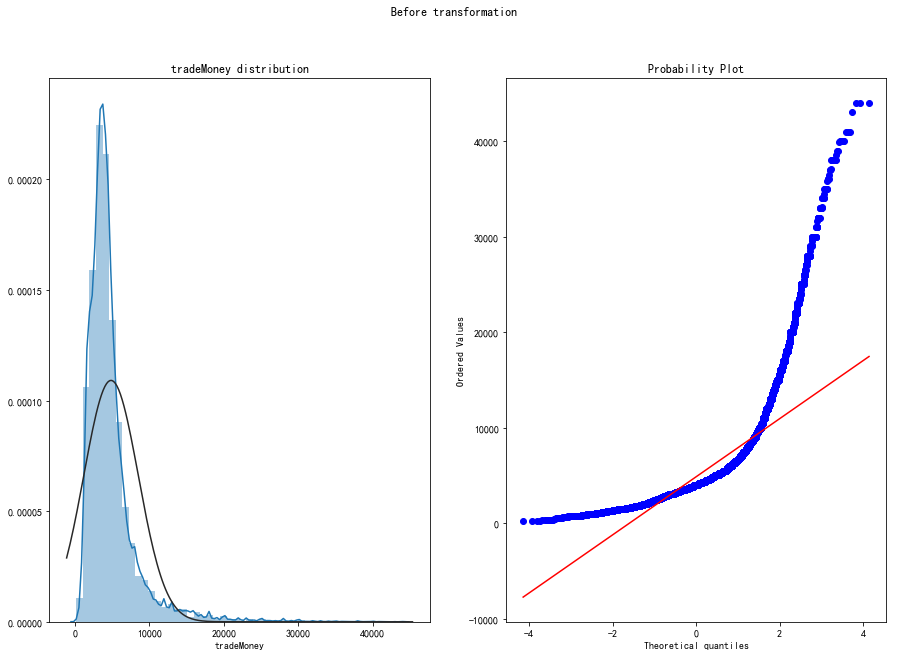

In [2348]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
sns.distplot(train_df["tradeMoney"],fit=norm)
plt.title('tradeMoney distribution')
ax2 = fig.add_subplot(122)
stats.probplot(train_df["tradeMoney"],plot=plt)
plt.suptitle("Before transformation")
plt.show()

In [2349]:
train_df["tradeMoney"]=np.log1p(train_df["tradeMoney"])

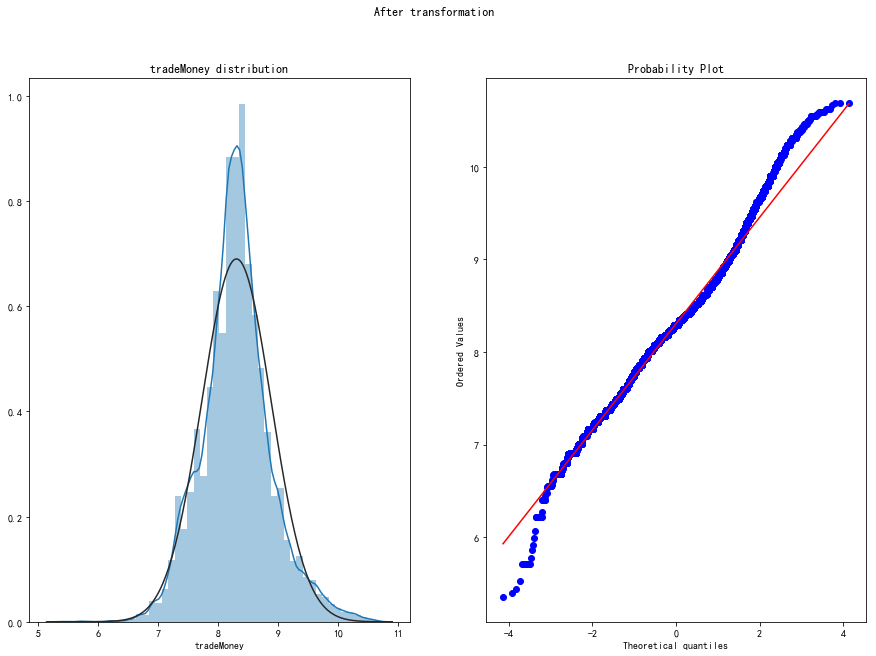

In [2350]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
sns.distplot(train_df["tradeMoney"],fit=norm)
plt.title('tradeMoney distribution')
ax2 = fig.add_subplot(122)
stats.probplot(train_df["tradeMoney"],plot=plt)
plt.suptitle("After transformation")
plt.show()

In [2351]:
print("Skewness:",train_df['tradeMoney'].skew())

Skewness: 0.30641498993385424


In [2352]:
print("Kurtness:",train_df["tradeMoney"].kurt())

Kurtness: 1.0218937477980674


## -------------------------------------------Outlier Values------------------------------------------------

In [2353]:
##--split the data set into numerical data and categorial--
data_feature = pd.concat((train_df,test_df)).reset_index(drop=True)
categorial_feature=data_feature.select_dtypes(include=["object"]).columns
categorial_feature

Index(['buildYear', 'communityName', 'houseDecoration', 'houseFloor',
       'houseToward', 'houseType', 'plate', 'region', 'rentType', 'tradeTime'],
      dtype='object')

In [2354]:
numerical_feature=data_feature.select_dtypes(exclude=["object"]).columns
numerical_feature

Index(['area', 'bankNum', 'busStationNum', 'drugStoreNum', 'gymNum',
       'hospitalNum', 'interSchoolNum', 'landMeanPrice', 'landTotalPrice',
       'lookNum', 'mallNum', 'newWorkers', 'parkNum', 'privateSchoolNum', 'pv',
       'remainNewNum', 'residentPopulation', 'saleSecHouseNum', 'schoolNum',
       'shopNum', 'subwayStationNum', 'superMarketNum', 'supplyLandArea',
       'supplyLandNum', 'supplyNewNum', 'totalFloor', 'totalNewTradeArea',
       'totalNewTradeMoney', 'totalTradeArea', 'totalTradeMoney',
       'totalWorkers', 'tradeLandArea', 'tradeLandNum', 'tradeMeanPrice',
       'tradeMoney', 'tradeNewMeanPrice', 'tradeNewNum', 'tradeSecNum', 'uv'],
      dtype='object')

In [2355]:
data_feature["rentType"].value_counts()

未知方式    32842
整租       5714
合租       3908
--          5
Name: rentType, dtype: int64

In [2356]:
train_df["rentType"][train_df["rentType"]=="--"]="整租"
test_df["rentType"][test_df["rentType"]=="--"]="整租"

In [2357]:
#--data_feature["communityName"].value_counts()-- 特征值的个数太多，直接删去
# train_df.drop("communityName",axis=1,inplace=True)
# test_df.drop("communityName",axis=1,inplace=True)

In [2358]:
#--data_feature["plate"].value_counts()--

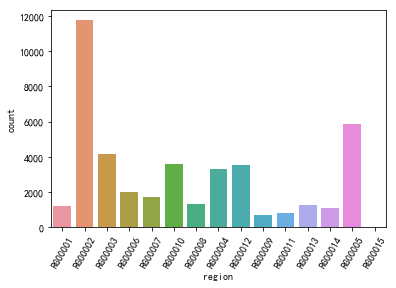

In [2359]:
#--data_feature["region"].value_counts()--
sns.countplot(x="region",data=data_feature)
plt.xticks(rotation=60)
plt.show()

In [2360]:
##--check numerical feature--
# data_feature.hist(bins=50,figsize=(12,9))
# plt.tight_layout(pad=0.5)
# plt.show()
numerical_feature_1=[x  for x in numerical_feature if x  not in ["tradeMoney","uv","pv"]]
# for col in numerical_feature_1:
#     fig = plt.figure(figsize=(12,9))
#     ax1 = fig.add_subplot(121)
#     sns.distplot(data_feature[col],fit=norm)
#     plt.title('%s distribution'%col)
#     ax2 = fig.add_subplot(122)
#     stats.probplot(data_feature[col],plot=plt)
#     plt.show()

可以看出来，一些特征完全偏离正态分布。如bankNum、

In [2361]:
# #对bankNum的异常值进行处理
# train_df=train_df[train_df["bankNum"]<100]
# fig = plt.figure(figsize=(12,9))
# ax1 = fig.add_subplot(121)
# sns.distplot(train_df["bankNum"],fit=norm)
# plt.title('bankNum distribution')
# ax2 = fig.add_subplot(122)
# stats.probplot(train_df["bankNum"],plot=plt)
# plt.show()

In [2362]:
# #对busStationNum的异常值进行处理
# train_df=train_df[train_df["busStationNum"]<800]
# fig = plt.figure(figsize=(12,9))
# ax1 = fig.add_subplot(121)
# sns.distplot(train_df["busStationNum"],fit=norm)
# plt.title('busStationNum distribution')
# ax2 = fig.add_subplot(122)
# stats.probplot(train_df["busStationNum"],plot=plt)
# plt.show()

In [2363]:
# #对newWorkers的异常值进行处理
# train_df=train_df[train_df["newWorkers"]<100]
# fig = plt.figure(figsize=(12,9))
# ax1 = fig.add_subplot(121)
# sns.distplot(train_df["newWorkers"],fit=norm)
# plt.title('newWorkers distribution')
# ax2 = fig.add_subplot(122)
# stats.probplot(train_df["newWorkers"],plot=plt)
# plt.show()

In [2364]:
#其余的异常值待处理

## --------------------------------------------------Missing data------------------------------------------------

In [2365]:
##--locating missing data--
data_feature = pd.concat((train_df,test_df)).reset_index(drop=True)
Total = data_feature.isnull().sum().sort_values(ascending=False)
Percent = Total/data_feature.isnull().count()
Missing_count = pd.concat((Total,Percent),axis=1,keys=['Total','Percent'],sort=False)
Missing_count[Missing_count.Total>0]

,Total,Percent
tradeMoney,2469,0.058
uv,20,0.000
pv,20,0.000


开始时设置了保留三位小数，所以这里显示为0

In [2366]:
data_feature["uv"].fillna(data_feature["uv"].median(),inplace=True)
data_feature["pv"].fillna(data_feature["pv"].median(),inplace=True)
data_feature["uv"]=data_feature["uv"].astype(int)
data_feature["pv"]=data_feature["pv"].astype(int)

In [2367]:
##--other Missing values like "暂无数据"、"未知方式"--
##将这些字段本身当做一个特征值

In [2368]:
##--check categorial--
data_feature["tradMonth"] = data_feature["tradeTime"].apply(lambda x:x.split("/")[1])
data_feature.drop("tradeTime",axis=1,inplace=True)

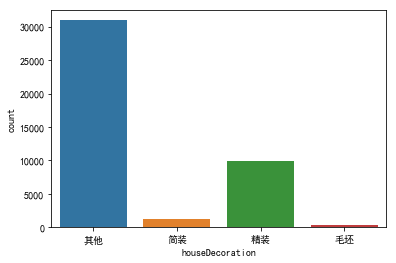

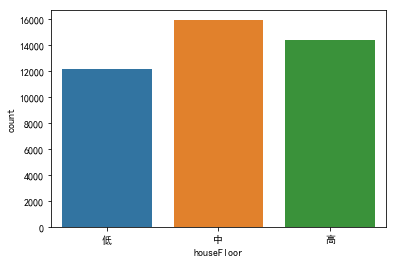

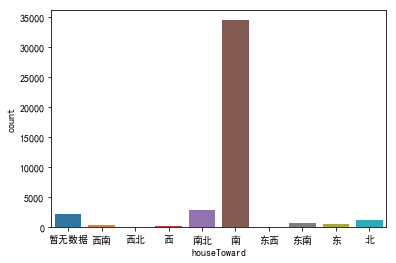

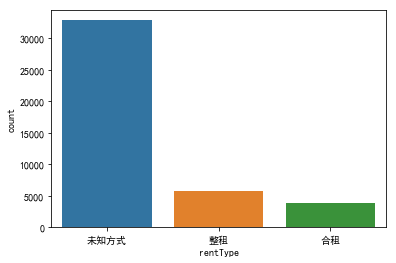

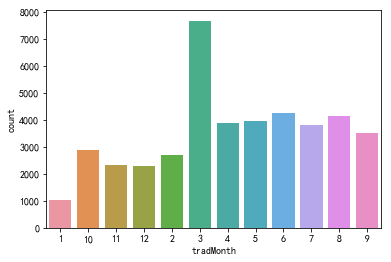

In [2369]:
##--plot--
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
columns_1=["houseDecoration","houseFloor","houseToward","rentType","tradMonth"];columns_2=["communityName","plate","region"]
for i in columns_1:
    sns.countplot(x=i,data=data_feature)
    plt.show()

"暂无数据"应该为"东北"，不过不改也没有影响

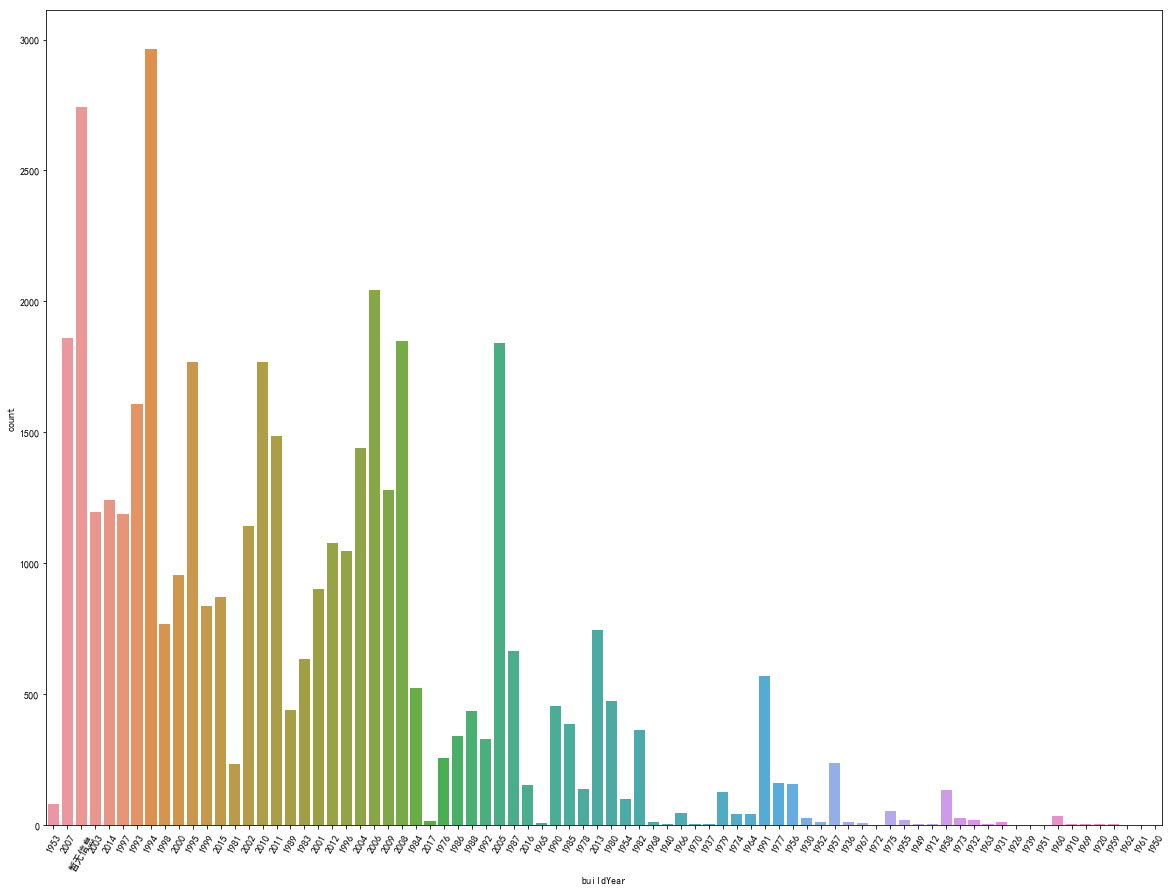

In [2370]:
# "buildYear"
fig,ax=plt.subplots(figsize=(20,15))
sns.countplot(x="buildYear",data=data_feature,ax=ax)
plt.xticks(rotation=60)
plt.show()

In [2371]:
data_feature['buildYear'] = np.where(data_feature['buildYear'] == '暂无信息', 2018, data_feature['buildYear'])
data_feature['buildYear'] = data_feature['buildYear'].astype(int)
data_feature['buildYear'] = data_feature['buildYear']-1910

In [2372]:
#transfrom buildYear to numerical feature
# sns.distplot(data_feature["buildYear"],fit=norm)
# plt.show()

In [2373]:
# print("buildYear before transform:")
# print(data_feature["buildYear"].skew())
# print(data_feature["buildYear"].kurt())

In [2374]:
# lm=0.15
# data_feature["buildYear"]=boxcox1p(data_feature["buildYear"],lm)

In [2375]:
# sns.distplot(data_feature["buildYear"],fit=norm)
# plt.show()

In [2376]:
# print("buildYear after transform:")
# print(data_feature["buildYear"].skew())
# print(data_feature["buildYear"].kurt())

## -----------------------------------Feature Engineering---------------------------------------

In [2377]:
#box cox transform for skewed numerical features
from scipy.stats import skew
numerical_feature=data_feature.select_dtypes(exclude=["object"]).columns
feat_num = data_feature[numerical_feature]
Skewness = feat_num.apply(lambda x:skew(x))
print(Skewness.sort_values(ascending=False))
print("There are {} skewed numerical feature to Box Cox.".format(Skewness.shape[0]))

newWorkers           12.436
landTotalPrice        7.164
landMeanPrice         6.778
lookNum               6.549
pv                    6.318
tradeLandNum          5.028
tradeLandArea         5.023
supplyLandArea        4.760
totalWorkers          3.873
saleSecHouseNum       3.861
supplyLandNum         3.269
tradeNewNum           3.175
uv                    3.111
totalNewTradeMoney    3.108
supplyNewNum          3.057
totalNewTradeArea     2.963
remainNewNum          2.529
busStationNum         2.100
area                  1.964
bankNum               1.941
superMarketNum        1.937
residentPopulation    1.729
subwayStationNum      1.677
parkNum               1.655
shopNum               1.512
totalFloor            1.446
drugStoreNum          1.355
totalTradeMoney       1.351
interSchoolNum        1.259
mallNum               1.229
gymNum                1.134
schoolNum             1.131
privateSchoolNum      1.005
hospitalNum           0.960
totalTradeArea        0.870
tradeNewMeanPrice   

In [2378]:
skewness = Skewness[abs(Skewness)>0.75]
skew_feature = skewness.index
lam = 0.5
for feat in skew_feature:
    data_feature[feat] = boxcox1p(data_feature[feat],lam)
print(data_feature[skew_feature].apply(lambda x:skew(x)).sort_values(ascending=False))

newWorkers            5.669
landTotalPrice        4.502
lookNum               4.416
tradeLandNum          4.156
landMeanPrice         3.962
tradeLandArea         3.578
supplyLandNum         2.941
supplyLandArea        2.884
saleSecHouseNum       2.342
supplyNewNum          2.059
totalWorkers          1.939
tradeNewNum           1.492
totalNewTradeMoney    1.247
totalNewTradeArea     1.226
busStationNum         1.180
pv                    1.145
residentPopulation    0.953
bankNum               0.927
superMarketNum        0.927
remainNewNum          0.905
totalFloor            0.867
shopNum               0.848
parkNum               0.833
subwayStationNum      0.813
drugStoreNum          0.752
uv                    0.749
interSchoolNum        0.663
mallNum               0.500
gymNum                0.364
area                  0.354
schoolNum             0.349
privateSchoolNum      0.342
hospitalNum           0.311
totalTradeMoney       0.219
totalTradeArea       -0.008
tradeNewMeanPrice   

In [2379]:
def parseRoom(info, index):
    res = int(info[index*2])
    return res
data_feature.insert(3,'室',None)
data_feature.insert(4, '厅', None)
data_feature.insert(5, '卫', None)
data_feature['室'] = data_feature['houseType'].apply(parseRoom, index=0)
data_feature['厅'] = data_feature['houseType'].apply(parseRoom, index=1)
data_feature['卫'] = data_feature['houseType'].apply(parseRoom, index=2)
data_feature.drop("houseType",axis=1,inplace=True)
# data_feature["Sum_house"]=data_feature['室']+data_feature['厅']+data_feature['卫']
# data_feature.drop("室",axis=1,inplace=True)
# data_feature.drop("厅",axis=1,inplace=True)
# data_feature.drop("卫",axis=1,inplace=True)

In [2380]:
#--add new feature--
data_feature["Total_schoolNum"]=(data_feature["interSchoolNum"]+data_feature["privateSchoolNum"]+data_feature["schoolNum"])
data_feature.drop("interSchoolNum",axis=1,inplace=True)
data_feature.drop("privateSchoolNum",axis=1,inplace=True)
data_feature.drop("schoolNum",axis=1,inplace=True)

In [2381]:
#--combine communityName and "室"、“厅”、“卫”--
data_feature["home_1comName"]=data_feature["室"].map(lambda x:str(x))+data_feature["communityName"].map(lambda x:str(x))
data_feature["home_2comName"]=data_feature["厅"].map(lambda x:str(x))+data_feature["communityName"].map(lambda x:str(x))
data_feature["home_3comName"]=data_feature["卫"].map(lambda x:str(x))+data_feature["communityName"].map(lambda x:str(x))

In [2382]:
data_feature["lookNum_pv"]=data_feature["lookNum"]/(data_feature["pv"])
data_feature["lookNum_uv"]=data_feature["lookNum"]/(data_feature["uv"])
# data_feature.drop("uv",axis=1,inplace=True)
# data_feature.drop("pv",axis=1,inplace=True)
# data_feature.drop("lookNum",axis=1,inplace=True)

In [2383]:
##--second-hand house--
data_feature["tradeMean"]=data_feature["totalTradeMoney"]/data_feature["totalTradeArea"]
data_feature["tradeSecRate"]=(data_feature["tradeSecNum"])/(data_feature["totalTradeArea"])
#data_feature["tradeNumMean"]=(data_feature["tradeSecNum"])/(data_feature["totalTradeMoney"])
#data_feature["totaltradeNumMean"]=(data_feature["tradeSecNum"])*(data_feature["tradeMeanPrice"])
data_feature.drop("totalTradeMoney",axis=1,inplace=True)
data_feature.drop("totalTradeArea",axis=1,inplace=True)

In [2384]:
##--New house--
##--improve model performace--
data_feature["tradeNewMean"]=data_feature["totalNewTradeMoney"]/data_feature["totalNewTradeArea"]
data_feature["tradeMoneyMean"]=data_feature["tradeNewNum"]/data_feature["totalNewTradeMoney"]
data_feature["tradeNewRate"]=data_feature["tradeNewNum"]/data_feature["supplyNewNum"]
data_feature["tradeNew_ReminRate"]=data_feature["remainNewNum"]/data_feature["supplyNewNum"]##
# data_feature.drop("totalNewTradeMoney",axis=1,inplace=True)
# data_feature.drop("totalNewTradeArea",axis=1,inplace=True)

In [2385]:
#data_feature["tradeNewMean"]=(data_feature["supplyLandNum"])*(data_feature["supplyLandArea"])
# data_feature.drop("supplyLandNum",axis=1,inplace=True)
# data_feature.drop("supplyLandArea",axis=1,inplace=True)

In [2386]:
data_feature["tracficStationNum"]=data_feature["subwayStationNum"]+data_feature["busStationNum"]
# data_feature.drop("subwayStationNum",axis=1,inplace=True)
# data_feature.drop("busStationNum",axis=1,inplace=True)##

In [2387]:
data_feature["MedicneNum"]=data_feature["hospitalNum"]+data_feature["drugStoreNum"]
data_feature["EntertainmentNum"]=data_feature["gymNum"]+data_feature["parkNum"]
data_feature["shoppingNum"]=data_feature["superMarketNum"]+data_feature["mallNum"]+data_feature["shopNum"]
# data_feature.drop("hospitalNum",axis=1,inplace=True)
# data_feature.drop("drugStoreNum",axis=1,inplace=True)

In [2388]:
##--population--
data_feature["newWorkersRate"]=(data_feature["newWorkers"])/(data_feature["residentPopulation"])

In [2389]:
data_feature["tracficSRate"]=(data_feature["tracficStationNum"])/(data_feature["residentPopulation"])
data_feature["EntertainmentNumRate"]=(data_feature["EntertainmentNum"])/(data_feature["residentPopulation"])
data_feature["shoppingNumRate"]=(data_feature["shoppingNum"])/(data_feature["residentPopulation"])

In [2390]:
#data_feature["shoppingNum"]=data_feature["superMarketNum"]+data_feature["mallNum"]+data_feature["shopNum"]

In [2391]:
#data_feature["BankRate"]=(data_feature["bankNum"])/(data_feature["residentPopulation"])

In [2392]:
##--Land--
## improve model performace
data_feature["tradeLandRate"]=(data_feature["tradeLandArea"])/(data_feature["supplyLandArea"])
data_feature["supplyNewRate"]=(data_feature["supplyNewNum"])/(data_feature["supplyLandArea"])

data_feature.drop("tradeLandArea",axis=1,inplace=True)
data_feature.drop("supplyLandArea",axis=1,inplace=True)

In [2393]:
data_feature.head(20)

,area,bankNum,buildYear,室,厅,卫,busStationNum,communityName,drugStoreNum,gymNum,...,tracficStationNum,MedicneNum,EntertainmentNum,shoppingNum,newWorkersRate,tracficSRate,EntertainmentNumRate,shoppingNumRate,tradeLandRate,supplyNewRate
0,14.620,6.246,11.266,2,1,1,10.166,XQ00051,5.211,6.000,...,13.822,6.040,8.899,25.142,0.071,0.021,0.013,0.038,nan,nan
1,20.499,6.246,17.799,3,2,2,25.203,XQ00130,8.583,2.899,...,26.667,9.411,6.190,38.507,0.028,0.034,0.008,0.049,nan,nan
2,21.065,10.329,18.881,3,2,2,13.620,XQ00179,8.000,10.000,...,16.912,10.000,13.292,28.155,0.060,0.023,0.018,0.039,nan,inf
3,13.232,11.856,18.881,1,1,1,36.210,XQ00313,16.330,9.136,...,38.210,20.330,11.136,57.701,0.079,0.038,0.011,0.057,1.000,0.000
4,20.804,4.633,18.881,3,2,3,21.833,XQ01257,7.381,2.899,...,21.833,7.381,5.798,29.396,0.028,0.031,0.008,0.042,nan,inf
5,27.957,17.596,17.391,4,3,3,31.287,XQ00457,19.817,14.125,...,38.878,25.563,21.922,67.799,0.248,0.023,0.013,0.040,0.000,0.088
6,15.882,11.856,18.494,2,2,1,36.210,XQ00246,16.330,9.136,...,38.210,20.330,11.136,57.701,0.074,0.038,0.011,0.057,nan,nan
7,15.550,16.655,16.762,2,1,1,40.988,XQ02331,18.688,10.166,...,44.280,21.980,13.822,72.069,0.000,0.036,0.011,0.059,nan,inf
8,20.050,16.655,17.799,3,2,1,40.988,XQ02346,18.688,10.166,...,44.280,21.980,13.822,72.069,0.000,0.036,0.011,0.059,nan,inf
9,16.330,16.655,16.330,3,1,1,40.988,XQ02310,18.688,10.166,...,44.280,21.980,13.822,72.069,0.000,0.036,0.011,0.059,nan,inf


In [2394]:
## OneHotEnconder
data_feature.drop(labels="tradeMoney",axis=1,inplace=True)
final_feature=pd.get_dummies(data_feature)
final_feature.shape
final_feature.head(10)

,area,bankNum,buildYear,室,厅,卫,busStationNum,drugStoreNum,gymNum,hospitalNum,...,home_3comName_5XQ03383,home_3comName_5XQ03388,home_3comName_5XQ03399,home_3comName_5XQ03424,home_3comName_5XQ04193,home_3comName_6XQ01020,home_3comName_6XQ01266,home_3comName_7XQ01046,home_3comName_7XQ01312,home_3comName_7XQ01689
0,14.620,6.246,11.266,2,1,1,10.166,5.211,6.000,0.828,...,0,0,0,0,0,0,0,0,0,0
1,20.499,6.246,17.799,3,2,2,25.203,8.583,2.899,0.828,...,0,0,0,0,0,0,0,0,0,0
2,21.065,10.329,18.881,3,2,2,13.620,8.000,10.000,2.000,...,0,0,0,0,0,0,0,0,0,0
3,13.232,11.856,18.881,1,1,1,36.210,16.330,9.136,4.000,...,0,0,0,0,0,0,0,0,0,0
4,20.804,4.633,18.881,3,2,3,21.833,7.381,2.899,0.000,...,0,0,0,0,0,0,0,0,0,0
5,27.957,17.596,17.391,4,3,3,31.287,19.817,14.125,5.746,...,0,0,0,0,0,0,0,0,0,0
6,15.882,11.856,18.494,2,2,1,36.210,16.330,9.136,4.000,...,0,0,0,0,0,0,0,0,0,0
7,15.550,16.655,16.762,2,1,1,40.988,18.688,10.166,3.292,...,0,0,0,0,0,0,0,0,0,0
8,20.050,16.655,17.799,3,2,1,40.988,18.688,10.166,3.292,...,0,0,0,0,0,0,0,0,0,0
9,16.330,16.655,16.330,3,1,1,40.988,18.688,10.166,3.292,...,0,0,0,0,0,0,0,0,0,0


In [2395]:
inter_feature=final_feature.copy()
X_train=inter_feature.iloc[:len(train_df["tradeMoney"]),:]
Y_train=np.expm1(train_df["tradeMoney"])
X_test=inter_feature.iloc[len(train_df["tradeMoney"]):,:]
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (40000, 25305)
Y_train shape: (40000,)
X_test shape: (2469, 25305)


In [2396]:
##--to prevent overfiting--
overfit = []
for i in X_train.columns:
    counts = X_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X_train) * 100 >99.94:
        overfit.append(i)
overfit

['communityName_XQ00001',
 'communityName_XQ00002',
 'communityName_XQ00003',
 'communityName_XQ00004',
 'communityName_XQ00005',
 'communityName_XQ00006',
 'communityName_XQ00007',
 'communityName_XQ00008',
 'communityName_XQ00009',
 'communityName_XQ00010',
 'communityName_XQ00011',
 'communityName_XQ00012',
 'communityName_XQ00013',
 'communityName_XQ00014',
 'communityName_XQ00015',
 'communityName_XQ00016',
 'communityName_XQ00017',
 'communityName_XQ00018',
 'communityName_XQ00019',
 'communityName_XQ00020',
 'communityName_XQ00021',
 'communityName_XQ00022',
 'communityName_XQ00023',
 'communityName_XQ00024',
 'communityName_XQ00025',
 'communityName_XQ00026',
 'communityName_XQ00027',
 'communityName_XQ00028',
 'communityName_XQ00029',
 'communityName_XQ00030',
 'communityName_XQ00031',
 'communityName_XQ00032',
 'communityName_XQ00033',
 'communityName_XQ00034',
 'communityName_XQ00035',
 'communityName_XQ00037',
 'communityName_XQ00038',
 'communityName_XQ00039',
 'communityN

In [2397]:
X_train.drop(list(overfit),axis=1,inplace=True)
X_test.drop(list(overfit),axis=1,inplace=True)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (40000, 1615)
X_test shape: (2469, 1615)


## -------------------------------------------------------Creating Model------------------------------------------------- 
### Key features of the model training process
#### Cross Validation:using 10-fold cross validation
#### On each run of cross validation fit 7models(ridge,svr,gradient boosting,random forest,xgboost,lightgbm regressor)
#### Stacking: trained a meta StackingCVRegressor optimized using xgboost
#### Blending:All model trained will overfit the training data to varying degrees.Therefore,blended all models to make final predition

In [2398]:
#import libraries
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

In [2399]:
#defining folds and score function
kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
def cv_rmse(model):
    rmse=np.sqrt(-cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv=kfolds))
    return rmse
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [2400]:
#defining models
#light gredient boosting Regressor
lightgbm=LGBMRegressor(object="regression",
                      num_leaves=31,
                      learning_rate=0.01,
                      n_estimators=800,
                      max_bin=200,
                      bagging_fraction=0.8,
                      bagging_freq=1,
                      bagging_seed=23,
                      feature_fraction=0.8,
                      feature_fraction_seed=8,
                      min_sum_hessian_in_leaf = 11,
                      verbose=-1,
                      random_state=42,)
# XGBoost Regressor
xgboost=XGBRegressor(learning_rate=0.1,
                    n_estimators=800,
                    max_depth=4,
                    min_child_weight=0,
                    gamma=0.6,
                    subsample=0.7,
                    colsample_bytree=0.7,
                    objective='reg:squarederror',
                    nthread=-1,
                    scale_pos_weight=1,
                    seed=27,
                    reg_alpha=0.00006,
                    random_state=42)
#Ridge Regressor
ridge_alphas=[1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50,]
ridge=make_pipeline(RobustScaler(),RidgeCV(alphas=ridge_alphas, cv=kfolds))
#Support Vector Regressor
svr=make_pipeline(RobustScaler(),SVR(C= 20, epsilon= 0.008, gamma=0.0003))
#gredient boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)


In [2401]:
scores={}
score=cv_rmse(lightgbm)
print("lightgbm\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
scores["lightgbm"]=((score.mean()),(score.std()))

lightgbm
 mean:1266.030  std:51.030


In [2402]:
# score=cv_rmse(xgboost)
# print("xgboost\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
# scores["xgboost"]=(score.mean(),score.std())

In [2403]:
# score=cv_rmse(ridge)
# print("ridge\n mean:{:.3f}  std:{:3f}".format(score.mean(),score.std()))
# scores["ridge"]=(score.mean(),score.mean())

In [2404]:
# score=cv_rmse(svr)
# print("svr\n mean:{:.3f}  std:{:3.f}".format(score.mean(),score.std()))
# scores["svr"]=(score.mean(),score.std())

In [2405]:
# score=cv_rmse(gbr)
# print("gbr\n mean:{:.3f} std:{:.3f}".format(score.mean(),score.std()))
# scores["gbr"]=(score.mean(),score.std())

In [2406]:
score=cv_rmse(lightgbm)
print("rf\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
scores["rf"]=(score.mean(),score.std())

rf
 mean:1266.030  std:51.030


In [2407]:
#Fit the model
elf=lightgbm.fit(X_train,Y_train)
pre = elf.predict(X_test)

In [2408]:
## predice score
from sklearn.metrics import r2_score
def online_score(pred):
    print("预测结果最大值：{}，预测结果最小值：{}".format(pred.max(),pred.min()))
    # a榜上分
    combine1 = pd.read_csv('D:/数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/sub_a_913.csv',engine = "python",header=None)
    score1 = r2_score(pred,combine1)
    print("score1:{}".format(score1))
    # # b榜上分
    # combine2 = pd.read_csv('sub_b_9194.csv')
    # score2 = r2_score(pred,combine2)
    # print("对比919分数：{}".format(score2))
scores=online_score(pre)
scores

预测结果最大值：18768.016983392696，预测结果最小值：1463.495107358813
score1:0.9313532415916177
